In [18]:
import matplotlib.pyplot as plt
import sys
sys.path.append('E:\\notebook\\mlpractical\\mlpractical-mlp2021-22-coursework1')

%matplotlib inline

plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}  #calculate accuracy,argmax()取数组中元素最大值的下标值

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [19]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102019 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x0000025180A76278>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x0000025180418F98>)


## Baseline

In [ ]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule()

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

## Task 1: Problem identification


**Varying number of hidden unites**

1.hidden units = 32

In [55]:
import matplotlib.pyplot as plt
import sys
sys.path.append('E:\\notebook\\mlpractical\\mlpractical-mlp2021-22-coursework1')

%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, no, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}  #calculate accuracy,argmax()取数组中元素最大值的下标值

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    
    if no == 0:
        color_train, color_valid = 'tomato', 'grey'
        line_valid = '--'
    
        # Plot the change in the validation and training set accuracy over training.
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
            stats[1:, keys['acc(train)']], label='width 32(train)',color=color_train)
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
            stats[1:, keys['acc(valid)']], label='width 32(valid)',color=color_valid,linestyle=line_valid)
        ax_1.legend(loc=0)
        ax_1.set_xlabel('Epoch number')
        ax_1.set_ylabel('Accuracy')
    
        # Plot the change in the validation and training set error over training.
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
            stats[1:, keys['error(train)']], label='width 32(train)',color=color_train)
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
            stats[1:, keys['error(valid)']], label='width 32(valid)',color=color_valid,linestyle=line_valid)
        ax_2.legend(loc=0)
        ax_2.set_xlabel('Epoch number')
        ax_2.set_ylabel('Error')
        return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2
    elif no == 1:
        color_train, color_valid = 'cornflowerblue', 'gold'
        line_valid = '--'
        
        # Plot the change in the validation and training set accuracy over training.
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
            stats[1:, keys['acc(train)']], label='width 64(train)',color=color_train)
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
            stats[1:, keys['acc(valid)']], label='width 64(valid)',color=color_valid,linestyle=line_valid)
        ax_1.legend(loc=0)
        # Plot the change in the validation and training set error over training.
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
            stats[1:, keys['error(train)']], label='width 64(train)',color=color_train)
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
            stats[1:, keys['error(valid)']], label='width 64(valid)',color=color_valid,linestyle=line_valid)
        ax_2.legend(loc=0)
        return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2
    else:
        color_train, color_valid = 'mediumpurple', 'yellowgreen'
        line_valid = '--'
        
        # Plot the change in the validation and training set accuracy over training.
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
            stats[1:, keys['acc(train)']], label='width 128(train)',color=color_train)
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
            stats[1:, keys['acc(valid)']], label='width 128(valid)',color=color_valid,linestyle=line_valid)
        ax_1.legend(loc=0)
        # Plot the change in the validation and training set error over training.
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
            stats[1:, keys['error(train)']], label='width 128(train)',color=color_train)
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
            stats[1:, keys['error(valid)']], label='width 128(valid)',color=color_valid,linestyle=line_valid)
        ax_2.legend(loc=0)
    
        return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [56]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102019 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x00000251861C5DA0>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x0000025188004240>)


--------------------------------------------------------------------------------
hidden unit:32
--------------------------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 1.3s to complete
    error(train)=1.23e+00, acc(train)=6.56e-01, error(valid)=1.23e+00, acc(valid)=6.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 1.3s to complete
    error(train)=1.12e+00, acc(train)=6.84e-01, error(valid)=1.13e+00, acc(valid)=6.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 1.3s to complete
    error(train)=1.04e+00, acc(train)=7.06e-01, error(valid)=1.06e+00, acc(valid)=7.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 1.2s to complete
    error(train)=9.74e-01, acc(train)=7.21e-01, error(valid)=9.98e-01, acc(valid)=7.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 1.3s to complete
    error(train)=9.34e-01, acc(train)=7.32e-01, error(valid)=9.63e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 1.2s to complete
    error(train)=9.02e-01, acc(train)=7.39e-01, error(valid)=9.31e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 1.2s to complete
    error(train)=8.63e-01, acc(train)=7.49e-01, error(valid)=8.99e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 1.2s to complete
    error(train)=8.43e-01, acc(train)=7.53e-01, error(valid)=8.80e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 1.3s to complete
    error(train)=8.24e-01, acc(train)=7.56e-01, error(valid)=8.67e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 1.4s to complete
    error(train)=8.03e-01, acc(train)=7.61e-01, error(valid)=8.46e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 1.3s to complete
    error(train)=7.87e-01, acc(train)=7.65e-01, error(valid)=8.36e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 1.3s to complete
    error(train)=7.66e-01, acc(train)=7.72e-01, error(valid)=8.15e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 1.2s to complete
    error(train)=7.56e-01, acc(train)=7.70e-01, error(valid)=8.06e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 1.3s to complete
    error(train)=7.41e-01, acc(train)=7.75e-01, error(valid)=8.00e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 1.2s to complete
    error(train)=7.43e-01, acc(train)=7.75e-01, error(valid)=8.00e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 1.2s to complete
    error(train)=7.18e-01, acc(train)=7.81e-01, error(valid)=7.79e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 1.3s to complete
    error(train)=7.11e-01, acc(train)=7.84e-01, error(valid)=7.72e-01, acc(valid)=7.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 1.2s to complete
    error(train)=7.10e-01, acc(train)=7.82e-01, error(valid)=7.74e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 1.3s to complete
    error(train)=6.99e-01, acc(train)=7.85e-01, error(valid)=7.68e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 1.2s to complete
    error(train)=6.99e-01, acc(train)=7.86e-01, error(valid)=7.66e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 1.2s to complete
    error(train)=6.83e-01, acc(train)=7.90e-01, error(valid)=7.55e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 1.3s to complete
    error(train)=6.79e-01, acc(train)=7.92e-01, error(valid)=7.52e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 1.2s to complete
    error(train)=6.72e-01, acc(train)=7.92e-01, error(valid)=7.44e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 1.2s to complete
    error(train)=6.68e-01, acc(train)=7.94e-01, error(valid)=7.40e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 1.3s to complete
    error(train)=6.65e-01, acc(train)=7.95e-01, error(valid)=7.44e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 1.2s to complete
    error(train)=6.57e-01, acc(train)=7.97e-01, error(valid)=7.37e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 1.3s to complete
    error(train)=6.61e-01, acc(train)=7.94e-01, error(valid)=7.40e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 1.3s to complete
    error(train)=6.59e-01, acc(train)=7.96e-01, error(valid)=7.38e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 1.2s to complete
    error(train)=6.52e-01, acc(train)=7.98e-01, error(valid)=7.37e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 1.2s to complete
    error(train)=6.47e-01, acc(train)=7.99e-01, error(valid)=7.30e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 1.2s to complete
    error(train)=6.46e-01, acc(train)=7.99e-01, error(valid)=7.33e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 1.2s to complete
    error(train)=6.41e-01, acc(train)=8.02e-01, error(valid)=7.27e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 1.2s to complete
    error(train)=6.34e-01, acc(train)=8.03e-01, error(valid)=7.21e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 1.2s to complete
    error(train)=6.38e-01, acc(train)=8.01e-01, error(valid)=7.25e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 1.3s to complete
    error(train)=6.37e-01, acc(train)=8.00e-01, error(valid)=7.26e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 1.2s to complete
    error(train)=6.32e-01, acc(train)=8.03e-01, error(valid)=7.22e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 1.2s to complete
    error(train)=6.29e-01, acc(train)=8.03e-01, error(valid)=7.20e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 1.3s to complete
    error(train)=6.28e-01, acc(train)=8.03e-01, error(valid)=7.24e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 1.2s to complete
    error(train)=6.24e-01, acc(train)=8.04e-01, error(valid)=7.20e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 1.3s to complete
    error(train)=6.26e-01, acc(train)=8.04e-01, error(valid)=7.22e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 1.7s to complete
    error(train)=6.20e-01, acc(train)=8.06e-01, error(valid)=7.18e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 1.7s to complete
    error(train)=6.22e-01, acc(train)=8.04e-01, error(valid)=7.23e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 1.7s to complete
    error(train)=6.28e-01, acc(train)=8.02e-01, error(valid)=7.27e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 1.6s to complete
    error(train)=6.14e-01, acc(train)=8.07e-01, error(valid)=7.13e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 1.6s to complete
    error(train)=6.14e-01, acc(train)=8.07e-01, error(valid)=7.17e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 1.6s to complete
    error(train)=6.16e-01, acc(train)=8.06e-01, error(valid)=7.23e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 1.7s to complete
    error(train)=6.13e-01, acc(train)=8.07e-01, error(valid)=7.23e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 1.6s to complete
    error(train)=6.08e-01, acc(train)=8.10e-01, error(valid)=7.13e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 1.7s to complete
    error(train)=6.08e-01, acc(train)=8.09e-01, error(valid)=7.19e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 1.7s to complete
    error(train)=6.08e-01, acc(train)=8.08e-01, error(valid)=7.19e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 1.7s to complete
    error(train)=6.01e-01, acc(train)=8.11e-01, error(valid)=7.12e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 1.7s to complete
    error(train)=6.01e-01, acc(train)=8.10e-01, error(valid)=7.12e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 1.7s to complete
    error(train)=5.98e-01, acc(train)=8.11e-01, error(valid)=7.11e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 1.7s to complete
    error(train)=6.01e-01, acc(train)=8.11e-01, error(valid)=7.16e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 1.7s to complete
    error(train)=5.92e-01, acc(train)=8.14e-01, error(valid)=7.06e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 1.7s to complete
    error(train)=5.94e-01, acc(train)=8.12e-01, error(valid)=7.13e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 1.7s to complete
    error(train)=5.94e-01, acc(train)=8.14e-01, error(valid)=7.13e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 1.6s to complete
    error(train)=5.94e-01, acc(train)=8.12e-01, error(valid)=7.14e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 1.7s to complete
    error(train)=5.94e-01, acc(train)=8.13e-01, error(valid)=7.15e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 1.6s to complete
    error(train)=5.89e-01, acc(train)=8.14e-01, error(valid)=7.11e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 1.7s to complete
    error(train)=5.96e-01, acc(train)=8.11e-01, error(valid)=7.18e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 1.6s to complete
    error(train)=5.85e-01, acc(train)=8.15e-01, error(valid)=7.08e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 1.6s to complete
    error(train)=5.93e-01, acc(train)=8.13e-01, error(valid)=7.20e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 1.7s to complete
    error(train)=5.88e-01, acc(train)=8.15e-01, error(valid)=7.13e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 1.7s to complete
    error(train)=5.91e-01, acc(train)=8.13e-01, error(valid)=7.14e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 1.7s to complete
    error(train)=5.85e-01, acc(train)=8.15e-01, error(valid)=7.08e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 1.7s to complete
    error(train)=5.80e-01, acc(train)=8.18e-01, error(valid)=7.09e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 1.6s to complete
    error(train)=5.81e-01, acc(train)=8.17e-01, error(valid)=7.11e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 1.6s to complete
    error(train)=5.83e-01, acc(train)=8.16e-01, error(valid)=7.12e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 1.7s to complete
    error(train)=5.86e-01, acc(train)=8.14e-01, error(valid)=7.18e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 1.6s to complete
    error(train)=5.85e-01, acc(train)=8.14e-01, error(valid)=7.17e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 1.7s to complete
    error(train)=5.79e-01, acc(train)=8.17e-01, error(valid)=7.14e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 1.6s to complete
    error(train)=5.78e-01, acc(train)=8.17e-01, error(valid)=7.11e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 1.7s to complete
    error(train)=5.80e-01, acc(train)=8.16e-01, error(valid)=7.14e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 1.6s to complete
    error(train)=5.83e-01, acc(train)=8.13e-01, error(valid)=7.18e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 1.7s to complete
    error(train)=5.76e-01, acc(train)=8.19e-01, error(valid)=7.11e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 1.6s to complete
    error(train)=5.77e-01, acc(train)=8.18e-01, error(valid)=7.17e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 1.7s to complete
    error(train)=5.75e-01, acc(train)=8.18e-01, error(valid)=7.13e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 1.7s to complete
    error(train)=5.75e-01, acc(train)=8.19e-01, error(valid)=7.14e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 1.6s to complete
    error(train)=5.71e-01, acc(train)=8.18e-01, error(valid)=7.08e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 1.6s to complete
    error(train)=5.75e-01, acc(train)=8.19e-01, error(valid)=7.17e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 1.6s to complete
    error(train)=5.81e-01, acc(train)=8.16e-01, error(valid)=7.19e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 1.7s to complete
    error(train)=5.73e-01, acc(train)=8.19e-01, error(valid)=7.17e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 1.6s to complete
    error(train)=5.69e-01, acc(train)=8.21e-01, error(valid)=7.12e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 1.8s to complete
    error(train)=5.77e-01, acc(train)=8.18e-01, error(valid)=7.20e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 1.6s to complete
    error(train)=5.71e-01, acc(train)=8.19e-01, error(valid)=7.17e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 1.6s to complete
    error(train)=5.71e-01, acc(train)=8.21e-01, error(valid)=7.18e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 1.6s to complete
    error(train)=5.71e-01, acc(train)=8.20e-01, error(valid)=7.18e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 1.6s to complete
    error(train)=5.68e-01, acc(train)=8.20e-01, error(valid)=7.17e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 1.7s to complete
    error(train)=5.78e-01, acc(train)=8.16e-01, error(valid)=7.29e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 1.6s to complete
    error(train)=5.66e-01, acc(train)=8.21e-01, error(valid)=7.15e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 1.7s to complete
    error(train)=5.65e-01, acc(train)=8.20e-01, error(valid)=7.14e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 1.6s to complete
    error(train)=5.63e-01, acc(train)=8.21e-01, error(valid)=7.15e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 1.7s to complete
    error(train)=5.74e-01, acc(train)=8.18e-01, error(valid)=7.25e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 1.6s to complete
    error(train)=5.64e-01, acc(train)=8.21e-01, error(valid)=7.16e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 1.6s to complete
    error(train)=5.67e-01, acc(train)=8.20e-01, error(valid)=7.21e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 1.6s to complete
    error(train)=5.64e-01, acc(train)=8.21e-01, error(valid)=7.16e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 1.7s to complete
    error(train)=5.70e-01, acc(train)=8.20e-01, error(valid)=7.24e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 1.6s to complete
    error(train)=5.63e-01, acc(train)=8.20e-01, error(valid)=7.19e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 1.7s to complete
    error(train)=5.65e-01, acc(train)=8.20e-01, error(valid)=7.17e-01, acc(valid)=7.85e-01


hidden units  = 32
    final error(train) = 3.37e-01
    final error(valid) = 6.79e-01
    final acc(train)   = 8.82e-01
    final acc(valid)   = 8.06e-01
    run time per epoch = 3.24
--------------------------------------------------------------------------------
hidden unit:64
--------------------------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 1.8s to complete
    error(train)=1.06e+00, acc(train)=7.02e-01, error(valid)=1.07e+00, acc(valid)=6.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 1.9s to complete
    error(train)=8.93e-01, acc(train)=7.40e-01, error(valid)=9.19e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 1.8s to complete
    error(train)=7.89e-01, acc(train)=7.68e-01, error(valid)=8.22e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 1.8s to complete
    error(train)=7.37e-01, acc(train)=7.80e-01, error(valid)=7.76e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 1.9s to complete
    error(train)=6.87e-01, acc(train)=7.92e-01, error(valid)=7.34e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 1.8s to complete
    error(train)=6.46e-01, acc(train)=8.05e-01, error(valid)=7.02e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 1.8s to complete
    error(train)=6.22e-01, acc(train)=8.08e-01, error(valid)=6.85e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 1.8s to complete
    error(train)=6.07e-01, acc(train)=8.10e-01, error(valid)=6.78e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 1.8s to complete
    error(train)=5.88e-01, acc(train)=8.14e-01, error(valid)=6.61e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 1.8s to complete
    error(train)=5.60e-01, acc(train)=8.24e-01, error(valid)=6.41e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 1.9s to complete
    error(train)=5.48e-01, acc(train)=8.28e-01, error(valid)=6.30e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.0s to complete
    error(train)=5.44e-01, acc(train)=8.27e-01, error(valid)=6.32e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 1.9s to complete
    error(train)=5.32e-01, acc(train)=8.31e-01, error(valid)=6.19e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 1.9s to complete
    error(train)=5.20e-01, acc(train)=8.33e-01, error(valid)=6.15e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 1.9s to complete
    error(train)=5.13e-01, acc(train)=8.35e-01, error(valid)=6.18e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 1.9s to complete
    error(train)=5.00e-01, acc(train)=8.37e-01, error(valid)=6.04e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 1.9s to complete
    error(train)=4.97e-01, acc(train)=8.39e-01, error(valid)=6.09e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 1.9s to complete
    error(train)=4.82e-01, acc(train)=8.44e-01, error(valid)=5.96e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 2.4s to complete
    error(train)=4.89e-01, acc(train)=8.40e-01, error(valid)=6.08e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 2.0s to complete
    error(train)=4.84e-01, acc(train)=8.42e-01, error(valid)=6.05e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 2.0s to complete
    error(train)=4.73e-01, acc(train)=8.44e-01, error(valid)=6.02e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 2.0s to complete
    error(train)=4.61e-01, acc(train)=8.50e-01, error(valid)=5.89e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 2.0s to complete
    error(train)=4.65e-01, acc(train)=8.48e-01, error(valid)=5.97e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 2.0s to complete
    error(train)=4.60e-01, acc(train)=8.48e-01, error(valid)=5.96e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 2.0s to complete
    error(train)=4.55e-01, acc(train)=8.51e-01, error(valid)=5.94e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 2.0s to complete
    error(train)=4.55e-01, acc(train)=8.51e-01, error(valid)=5.97e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 2.0s to complete
    error(train)=4.46e-01, acc(train)=8.53e-01, error(valid)=5.92e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 2.0s to complete
    error(train)=4.42e-01, acc(train)=8.54e-01, error(valid)=5.92e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 2.0s to complete
    error(train)=4.37e-01, acc(train)=8.57e-01, error(valid)=5.93e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 2.0s to complete
    error(train)=4.39e-01, acc(train)=8.53e-01, error(valid)=5.98e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 2.0s to complete
    error(train)=4.34e-01, acc(train)=8.57e-01, error(valid)=5.98e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 2.0s to complete
    error(train)=4.48e-01, acc(train)=8.49e-01, error(valid)=6.10e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 2.0s to complete
    error(train)=4.21e-01, acc(train)=8.59e-01, error(valid)=5.90e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 2.0s to complete
    error(train)=4.21e-01, acc(train)=8.59e-01, error(valid)=5.94e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 2.0s to complete
    error(train)=4.24e-01, acc(train)=8.57e-01, error(valid)=5.99e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 2.0s to complete
    error(train)=4.20e-01, acc(train)=8.60e-01, error(valid)=5.98e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 2.0s to complete
    error(train)=4.20e-01, acc(train)=8.61e-01, error(valid)=6.03e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 2.0s to complete
    error(train)=4.15e-01, acc(train)=8.61e-01, error(valid)=6.02e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 2.0s to complete
    error(train)=4.10e-01, acc(train)=8.62e-01, error(valid)=5.99e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 2.0s to complete
    error(train)=4.13e-01, acc(train)=8.60e-01, error(valid)=6.04e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 2.0s to complete
    error(train)=4.07e-01, acc(train)=8.64e-01, error(valid)=6.02e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 2.0s to complete
    error(train)=4.10e-01, acc(train)=8.61e-01, error(valid)=6.07e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 2.0s to complete
    error(train)=4.03e-01, acc(train)=8.63e-01, error(valid)=6.00e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 2.0s to complete
    error(train)=4.06e-01, acc(train)=8.63e-01, error(valid)=6.04e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 1.9s to complete
    error(train)=4.03e-01, acc(train)=8.63e-01, error(valid)=6.09e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 2.0s to complete
    error(train)=4.02e-01, acc(train)=8.65e-01, error(valid)=6.09e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 2.0s to complete
    error(train)=3.98e-01, acc(train)=8.65e-01, error(valid)=6.07e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 2.0s to complete
    error(train)=3.91e-01, acc(train)=8.67e-01, error(valid)=6.06e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 2.0s to complete
    error(train)=3.89e-01, acc(train)=8.68e-01, error(valid)=6.10e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 2.0s to complete
    error(train)=3.86e-01, acc(train)=8.70e-01, error(valid)=6.02e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 2.0s to complete
    error(train)=3.87e-01, acc(train)=8.70e-01, error(valid)=6.05e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 2.0s to complete
    error(train)=3.85e-01, acc(train)=8.68e-01, error(valid)=6.08e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 2.1s to complete
    error(train)=3.80e-01, acc(train)=8.70e-01, error(valid)=6.05e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 2.0s to complete
    error(train)=3.81e-01, acc(train)=8.71e-01, error(valid)=6.09e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 2.0s to complete
    error(train)=3.84e-01, acc(train)=8.69e-01, error(valid)=6.15e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 2.0s to complete
    error(train)=3.81e-01, acc(train)=8.71e-01, error(valid)=6.13e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 2.0s to complete
    error(train)=3.79e-01, acc(train)=8.72e-01, error(valid)=6.12e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 2.0s to complete
    error(train)=3.76e-01, acc(train)=8.70e-01, error(valid)=6.19e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 2.0s to complete
    error(train)=3.79e-01, acc(train)=8.69e-01, error(valid)=6.19e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 2.2s to complete
    error(train)=3.72e-01, acc(train)=8.73e-01, error(valid)=6.13e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 2.0s to complete
    error(train)=3.68e-01, acc(train)=8.74e-01, error(valid)=6.17e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 2.0s to complete
    error(train)=3.70e-01, acc(train)=8.72e-01, error(valid)=6.21e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 2.7s to complete
    error(train)=3.71e-01, acc(train)=8.72e-01, error(valid)=6.21e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 2.2s to complete
    error(train)=3.66e-01, acc(train)=8.75e-01, error(valid)=6.18e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 2.1s to complete
    error(train)=3.67e-01, acc(train)=8.74e-01, error(valid)=6.20e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 2.0s to complete
    error(train)=3.76e-01, acc(train)=8.71e-01, error(valid)=6.32e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 2.0s to complete
    error(train)=3.70e-01, acc(train)=8.72e-01, error(valid)=6.30e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 2.0s to complete
    error(train)=3.63e-01, acc(train)=8.76e-01, error(valid)=6.28e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 2.2s to complete
    error(train)=3.61e-01, acc(train)=8.76e-01, error(valid)=6.29e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 2.0s to complete
    error(train)=3.62e-01, acc(train)=8.75e-01, error(valid)=6.29e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 2.0s to complete
    error(train)=3.71e-01, acc(train)=8.72e-01, error(valid)=6.40e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 2.0s to complete
    error(train)=3.62e-01, acc(train)=8.75e-01, error(valid)=6.32e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 2.1s to complete
    error(train)=3.58e-01, acc(train)=8.76e-01, error(valid)=6.36e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 2.3s to complete
    error(train)=3.58e-01, acc(train)=8.77e-01, error(valid)=6.41e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 2.4s to complete
    error(train)=3.59e-01, acc(train)=8.77e-01, error(valid)=6.39e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 2.2s to complete
    error(train)=3.55e-01, acc(train)=8.76e-01, error(valid)=6.41e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 2.1s to complete
    error(train)=3.65e-01, acc(train)=8.74e-01, error(valid)=6.48e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 2.2s to complete
    error(train)=3.57e-01, acc(train)=8.76e-01, error(valid)=6.48e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 2.1s to complete
    error(train)=3.51e-01, acc(train)=8.79e-01, error(valid)=6.44e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 2.0s to complete
    error(train)=3.46e-01, acc(train)=8.81e-01, error(valid)=6.39e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 2.0s to complete
    error(train)=3.52e-01, acc(train)=8.78e-01, error(valid)=6.48e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 2.0s to complete
    error(train)=3.61e-01, acc(train)=8.74e-01, error(valid)=6.61e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 2.0s to complete
    error(train)=3.45e-01, acc(train)=8.81e-01, error(valid)=6.42e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 2.0s to complete
    error(train)=3.50e-01, acc(train)=8.79e-01, error(valid)=6.53e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 2.0s to complete
    error(train)=3.48e-01, acc(train)=8.80e-01, error(valid)=6.52e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 2.0s to complete
    error(train)=3.50e-01, acc(train)=8.78e-01, error(valid)=6.55e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 2.5s to complete
    error(train)=3.40e-01, acc(train)=8.83e-01, error(valid)=6.50e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 2.0s to complete
    error(train)=3.37e-01, acc(train)=8.84e-01, error(valid)=6.51e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 2.0s to complete
    error(train)=3.41e-01, acc(train)=8.81e-01, error(valid)=6.50e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 2.0s to complete
    error(train)=3.44e-01, acc(train)=8.80e-01, error(valid)=6.61e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 2.3s to complete
    error(train)=3.39e-01, acc(train)=8.82e-01, error(valid)=6.59e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 2.1s to complete
    error(train)=3.46e-01, acc(train)=8.79e-01, error(valid)=6.68e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 2.0s to complete
    error(train)=3.47e-01, acc(train)=8.79e-01, error(valid)=6.70e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 2.0s to complete
    error(train)=3.45e-01, acc(train)=8.81e-01, error(valid)=6.69e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 2.0s to complete
    error(train)=3.43e-01, acc(train)=8.81e-01, error(valid)=6.69e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 2.0s to complete
    error(train)=3.34e-01, acc(train)=8.84e-01, error(valid)=6.62e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 1.9s to complete
    error(train)=3.37e-01, acc(train)=8.83e-01, error(valid)=6.67e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 2.0s to complete
    error(train)=3.43e-01, acc(train)=8.80e-01, error(valid)=6.73e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 2.0s to complete
    error(train)=3.41e-01, acc(train)=8.79e-01, error(valid)=6.79e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 2.0s to complete
    error(train)=3.37e-01, acc(train)=8.82e-01, error(valid)=6.79e-01, acc(valid)=8.06e-01


hidden units  = 64
    final error(train) = 3.37e-01
    final error(valid) = 6.79e-01
    final acc(train)   = 8.82e-01
    final acc(valid)   = 8.06e-01
    run time per epoch = 3.24
--------------------------------------------------------------------------------
hidden unit:128
--------------------------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 3.3s to complete
    error(train)=9.06e-01, acc(train)=7.37e-01, error(valid)=9.22e-01, acc(valid)=7.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 4.3s to complete
    error(train)=7.00e-01, acc(train)=7.90e-01, error(valid)=7.37e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 3.3s to complete
    error(train)=6.05e-01, acc(train)=8.11e-01, error(valid)=6.57e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.3s to complete
    error(train)=5.54e-01, acc(train)=8.24e-01, error(valid)=6.18e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 3.3s to complete
    error(train)=5.04e-01, acc(train)=8.38e-01, error(valid)=5.81e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 4.3s to complete
    error(train)=4.81e-01, acc(train)=8.45e-01, error(valid)=5.68e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 4.4s to complete
    error(train)=4.64e-01, acc(train)=8.47e-01, error(valid)=5.60e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 4.4s to complete
    error(train)=4.41e-01, acc(train)=8.53e-01, error(valid)=5.51e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 4.4s to complete
    error(train)=4.15e-01, acc(train)=8.63e-01, error(valid)=5.37e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 4.4s to complete
    error(train)=4.08e-01, acc(train)=8.63e-01, error(valid)=5.41e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 4.5s to complete
    error(train)=3.87e-01, acc(train)=8.72e-01, error(valid)=5.30e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.4s to complete
    error(train)=3.81e-01, acc(train)=8.71e-01, error(valid)=5.38e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 4.5s to complete
    error(train)=3.81e-01, acc(train)=8.70e-01, error(valid)=5.46e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.5s to complete
    error(train)=3.72e-01, acc(train)=8.74e-01, error(valid)=5.48e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.5s to complete
    error(train)=3.61e-01, acc(train)=8.76e-01, error(valid)=5.42e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 4.4s to complete
    error(train)=3.51e-01, acc(train)=8.79e-01, error(valid)=5.41e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 3.8s to complete
    error(train)=3.56e-01, acc(train)=8.77e-01, error(valid)=5.57e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 3.7s to complete
    error(train)=3.32e-01, acc(train)=8.85e-01, error(valid)=5.38e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 3.7s to complete
    error(train)=3.25e-01, acc(train)=8.88e-01, error(valid)=5.43e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 3.7s to complete
    error(train)=3.21e-01, acc(train)=8.88e-01, error(valid)=5.47e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 3.7s to complete
    error(train)=3.15e-01, acc(train)=8.91e-01, error(valid)=5.49e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 3.7s to complete
    error(train)=3.10e-01, acc(train)=8.92e-01, error(valid)=5.48e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 3.7s to complete
    error(train)=3.08e-01, acc(train)=8.93e-01, error(valid)=5.63e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 3.7s to complete
    error(train)=3.03e-01, acc(train)=8.93e-01, error(valid)=5.65e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 3.8s to complete
    error(train)=3.00e-01, acc(train)=8.94e-01, error(valid)=5.63e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 3.7s to complete
    error(train)=2.95e-01, acc(train)=8.95e-01, error(valid)=5.79e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 3.7s to complete
    error(train)=2.89e-01, acc(train)=8.98e-01, error(valid)=5.73e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 3.7s to complete
    error(train)=2.81e-01, acc(train)=9.00e-01, error(valid)=5.77e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 3.7s to complete
    error(train)=2.81e-01, acc(train)=8.99e-01, error(valid)=5.83e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 3.7s to complete
    error(train)=2.83e-01, acc(train)=9.00e-01, error(valid)=5.95e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 3.8s to complete
    error(train)=2.74e-01, acc(train)=9.01e-01, error(valid)=5.92e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 3.7s to complete
    error(train)=2.72e-01, acc(train)=9.02e-01, error(valid)=6.06e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 3.7s to complete
    error(train)=2.66e-01, acc(train)=9.05e-01, error(valid)=6.00e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 3.5s to complete
    error(train)=2.62e-01, acc(train)=9.06e-01, error(valid)=6.04e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 3.5s to complete
    error(train)=2.64e-01, acc(train)=9.05e-01, error(valid)=6.10e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 3.6s to complete
    error(train)=2.67e-01, acc(train)=9.03e-01, error(valid)=6.27e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 3.5s to complete
    error(train)=2.59e-01, acc(train)=9.06e-01, error(valid)=6.22e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 3.5s to complete
    error(train)=2.58e-01, acc(train)=9.06e-01, error(valid)=6.32e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 3.6s to complete
    error(train)=2.56e-01, acc(train)=9.06e-01, error(valid)=6.34e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 3.6s to complete
    error(train)=2.49e-01, acc(train)=9.10e-01, error(valid)=6.36e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 3.6s to complete
    error(train)=2.41e-01, acc(train)=9.14e-01, error(valid)=6.32e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 3.5s to complete
    error(train)=2.47e-01, acc(train)=9.09e-01, error(valid)=6.51e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 3.5s to complete
    error(train)=2.41e-01, acc(train)=9.12e-01, error(valid)=6.54e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 3.8s to complete
    error(train)=2.42e-01, acc(train)=9.11e-01, error(valid)=6.64e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 3.5s to complete
    error(train)=2.39e-01, acc(train)=9.12e-01, error(valid)=6.65e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 3.5s to complete
    error(train)=2.34e-01, acc(train)=9.15e-01, error(valid)=6.70e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 3.5s to complete
    error(train)=2.44e-01, acc(train)=9.11e-01, error(valid)=6.83e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 3.5s to complete
    error(train)=2.31e-01, acc(train)=9.15e-01, error(valid)=6.85e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 3.8s to complete
    error(train)=2.24e-01, acc(train)=9.19e-01, error(valid)=6.85e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 3.5s to complete
    error(train)=2.21e-01, acc(train)=9.20e-01, error(valid)=6.85e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 3.5s to complete
    error(train)=2.22e-01, acc(train)=9.19e-01, error(valid)=6.98e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 3.6s to complete
    error(train)=2.20e-01, acc(train)=9.19e-01, error(valid)=7.02e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 3.4s to complete
    error(train)=2.24e-01, acc(train)=9.17e-01, error(valid)=7.18e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 3.5s to complete
    error(train)=2.29e-01, acc(train)=9.14e-01, error(valid)=7.28e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 3.5s to complete
    error(train)=2.14e-01, acc(train)=9.20e-01, error(valid)=7.09e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 3.4s to complete
    error(train)=2.09e-01, acc(train)=9.23e-01, error(valid)=7.17e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 3.5s to complete
    error(train)=2.14e-01, acc(train)=9.20e-01, error(valid)=7.31e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 3.5s to complete
    error(train)=2.08e-01, acc(train)=9.23e-01, error(valid)=7.35e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 3.7s to complete
    error(train)=2.04e-01, acc(train)=9.24e-01, error(valid)=7.38e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 3.5s to complete
    error(train)=2.15e-01, acc(train)=9.20e-01, error(valid)=7.54e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 3.6s to complete
    error(train)=2.04e-01, acc(train)=9.25e-01, error(valid)=7.49e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 3.5s to complete
    error(train)=2.03e-01, acc(train)=9.24e-01, error(valid)=7.61e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 3.5s to complete
    error(train)=2.02e-01, acc(train)=9.24e-01, error(valid)=7.67e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 3.5s to complete
    error(train)=2.13e-01, acc(train)=9.19e-01, error(valid)=7.82e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 3.5s to complete
    error(train)=1.95e-01, acc(train)=9.28e-01, error(valid)=7.61e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 3.5s to complete
    error(train)=2.12e-01, acc(train)=9.19e-01, error(valid)=7.90e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 3.5s to complete
    error(train)=1.93e-01, acc(train)=9.28e-01, error(valid)=7.86e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 3.5s to complete
    error(train)=1.98e-01, acc(train)=9.25e-01, error(valid)=7.89e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 3.5s to complete
    error(train)=1.89e-01, acc(train)=9.29e-01, error(valid)=8.01e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 3.5s to complete
    error(train)=1.95e-01, acc(train)=9.25e-01, error(valid)=8.08e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 3.5s to complete
    error(train)=1.93e-01, acc(train)=9.27e-01, error(valid)=8.16e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 3.6s to complete
    error(train)=1.82e-01, acc(train)=9.33e-01, error(valid)=8.05e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 3.6s to complete
    error(train)=1.96e-01, acc(train)=9.27e-01, error(valid)=8.34e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 3.5s to complete
    error(train)=1.85e-01, acc(train)=9.31e-01, error(valid)=8.15e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 3.5s to complete
    error(train)=1.81e-01, acc(train)=9.32e-01, error(valid)=8.28e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 3.5s to complete
    error(train)=1.84e-01, acc(train)=9.30e-01, error(valid)=8.36e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 3.5s to complete
    error(train)=1.82e-01, acc(train)=9.31e-01, error(valid)=8.43e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 3.5s to complete
    error(train)=1.87e-01, acc(train)=9.29e-01, error(valid)=8.56e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 3.5s to complete
    error(train)=1.82e-01, acc(train)=9.32e-01, error(valid)=8.54e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 3.5s to complete
    error(train)=1.75e-01, acc(train)=9.34e-01, error(valid)=8.65e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 3.4s to complete
    error(train)=1.76e-01, acc(train)=9.34e-01, error(valid)=8.60e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 3.4s to complete
    error(train)=1.77e-01, acc(train)=9.33e-01, error(valid)=8.67e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 3.5s to complete
    error(train)=1.86e-01, acc(train)=9.29e-01, error(valid)=8.99e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 3.4s to complete
    error(train)=1.73e-01, acc(train)=9.34e-01, error(valid)=8.87e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 3.5s to complete
    error(train)=1.72e-01, acc(train)=9.35e-01, error(valid)=8.96e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 3.4s to complete
    error(train)=1.70e-01, acc(train)=9.36e-01, error(valid)=8.99e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 3.5s to complete
    error(train)=1.81e-01, acc(train)=9.31e-01, error(valid)=9.13e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 3.5s to complete
    error(train)=1.68e-01, acc(train)=9.36e-01, error(valid)=9.14e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 3.5s to complete
    error(train)=1.71e-01, acc(train)=9.33e-01, error(valid)=9.25e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 3.5s to complete
    error(train)=1.74e-01, acc(train)=9.32e-01, error(valid)=9.28e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 3.6s to complete
    error(train)=1.68e-01, acc(train)=9.36e-01, error(valid)=9.46e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 3.5s to complete
    error(train)=1.71e-01, acc(train)=9.34e-01, error(valid)=9.32e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 3.5s to complete
    error(train)=1.64e-01, acc(train)=9.38e-01, error(valid)=9.37e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 3.5s to complete
    error(train)=1.67e-01, acc(train)=9.35e-01, error(valid)=9.52e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 3.4s to complete
    error(train)=1.68e-01, acc(train)=9.35e-01, error(valid)=9.60e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 3.4s to complete
    error(train)=1.75e-01, acc(train)=9.30e-01, error(valid)=9.88e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 3.4s to complete
    error(train)=1.57e-01, acc(train)=9.41e-01, error(valid)=9.63e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 3.4s to complete
    error(train)=1.54e-01, acc(train)=9.42e-01, error(valid)=9.64e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 3.4s to complete
    error(train)=1.67e-01, acc(train)=9.36e-01, error(valid)=9.87e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 3.5s to complete
    error(train)=1.59e-01, acc(train)=9.39e-01, error(valid)=9.99e-01, acc(valid)=8.02e-01


hidden units  = 128
    final error(train) = 3.37e-01
    final error(valid) = 6.79e-01
    final acc(train)   = 8.82e-01
    final acc(valid)   = 8.06e-01
    run time per epoch = 3.24


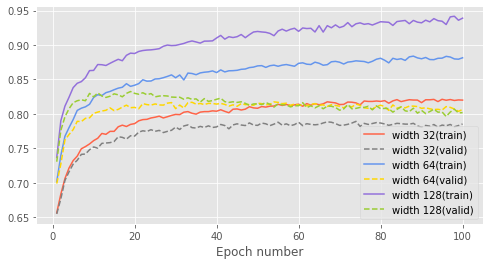

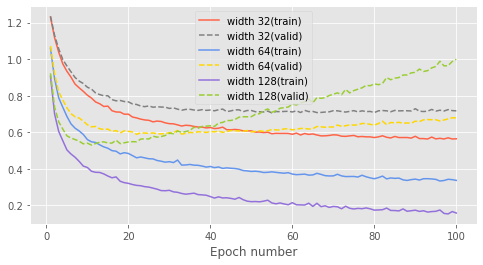

In [57]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.001
num_epochs = 100
stats_interval = 1
input_dim, output_dim = 784, 47 
hidden_dim = [32, 64, 128]  # hidden_dim是隐藏层节点数

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)


fig_1 = plt.figure(figsize=(8, 4))
ax_1 = fig_1.add_subplot(111)
fig_2 = plt.figure(figsize=(8, 4))
ax_2 = fig_2.add_subplot(111)
# 不同层的hidden_dim
for no in range(len(hidden_dim)):
    print('-' * 80)
    print('hidden unit:{0}'.format(hidden_dim[no]))
    print('-' * 80)

    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim[no], weights_init, biases_init),
        ReluLayer(),
        AffineLayer(hidden_dim[no], output_dim, weights_init, biases_init)
    ])


    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = AdamLearningRule()
    
    #Remember to use notebook=False when you write a script to be run in a terminal
    _ = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, no, notebook=True)
    print('hidden units  = {0}'.format(hidden_dim[no]))
    print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
    print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
    print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
    print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
    print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))


In [63]:
fig_1.savefig('accuracy_width.png')
fig_2.savefig('error_width.png')

In [73]:
# change label order ax_1
handles,labels = ax_1.get_legend_handles_labels()
handles = [handles[0], handles[2], handles[4], handles[1], handles[3], handles[5]]
labels = [labels[0], labels[2], labels[4], labels[1], labels[3], labels[5]]
ax_1.legend(handles,labels,loc=0)
# change label order ax_2
handles,labels = ax_2.get_legend_handles_labels()
handles = [handles[0], handles[2], handles[4], handles[1], handles[3], handles[5]]
labels = [labels[0], labels[2], labels[4], labels[1], labels[3], labels[5]]
ax_2.legend(handles,labels,loc=0)

In [74]:
fig_1.savefig('accuracy_width.png')
fig_2.savefig('error_width.png')

### Table1

In [77]:
import matplotlib.pyplot as plt
import sys
sys.path.append('E:\\notebook\\mlpractical\\mlpractical-mlp2021-22-coursework1')

%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}  #calculate accuracy,argmax()取数组中元素最大值的下标值

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [78]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102019 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x0000025189343668>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x00000251893439E8>)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 1.3s to complete
    error(train)=1.23e+00, acc(train)=6.56e-01, error(valid)=1.23e+00, acc(valid)=6.55e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 1.3s to complete
    error(train)=1.12e+00, acc(train)=6.84e-01, error(valid)=1.13e+00, acc(valid)=6.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 1.3s to complete
    error(train)=1.04e+00, acc(train)=7.06e-01, error(valid)=1.06e+00, acc(valid)=7.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 1.3s to complete
    error(train)=9.74e-01, acc(train)=7.21e-01, error(valid)=9.98e-01, acc(valid)=7.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 1.4s to complete
    error(train)=9.34e-01, acc(train)=7.32e-01, error(valid)=9.63e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 1.5s to complete
    error(train)=9.02e-01, acc(train)=7.39e-01, error(valid)=9.31e-01, acc(valid)=7.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 1.4s to complete
    error(train)=8.63e-01, acc(train)=7.49e-01, error(valid)=8.99e-01, acc(valid)=7.41e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 1.4s to complete
    error(train)=8.43e-01, acc(train)=7.53e-01, error(valid)=8.80e-01, acc(valid)=7.42e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 1.4s to complete
    error(train)=8.24e-01, acc(train)=7.56e-01, error(valid)=8.67e-01, acc(valid)=7.48e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 1.4s to complete
    error(train)=8.03e-01, acc(train)=7.61e-01, error(valid)=8.46e-01, acc(valid)=7.52e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 1.4s to complete
    error(train)=7.87e-01, acc(train)=7.65e-01, error(valid)=8.36e-01, acc(valid)=7.50e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 1.4s to complete
    error(train)=7.66e-01, acc(train)=7.72e-01, error(valid)=8.15e-01, acc(valid)=7.57e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 1.5s to complete
    error(train)=7.56e-01, acc(train)=7.70e-01, error(valid)=8.06e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 1.4s to complete
    error(train)=7.41e-01, acc(train)=7.75e-01, error(valid)=8.00e-01, acc(valid)=7.58e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 1.4s to complete
    error(train)=7.43e-01, acc(train)=7.75e-01, error(valid)=8.00e-01, acc(valid)=7.60e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 1.4s to complete
    error(train)=7.18e-01, acc(train)=7.81e-01, error(valid)=7.79e-01, acc(valid)=7.67e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 1.4s to complete
    error(train)=7.11e-01, acc(train)=7.84e-01, error(valid)=7.72e-01, acc(valid)=7.66e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 1.5s to complete
    error(train)=7.10e-01, acc(train)=7.82e-01, error(valid)=7.74e-01, acc(valid)=7.63e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 1.4s to complete
    error(train)=6.99e-01, acc(train)=7.85e-01, error(valid)=7.68e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 1.6s to complete
    error(train)=6.99e-01, acc(train)=7.86e-01, error(valid)=7.66e-01, acc(valid)=7.68e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 1.4s to complete
    error(train)=6.83e-01, acc(train)=7.90e-01, error(valid)=7.55e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 1.4s to complete
    error(train)=6.79e-01, acc(train)=7.92e-01, error(valid)=7.52e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 1.4s to complete
    error(train)=6.72e-01, acc(train)=7.92e-01, error(valid)=7.44e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 1.4s to complete
    error(train)=6.68e-01, acc(train)=7.94e-01, error(valid)=7.40e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 1.4s to complete
    error(train)=6.65e-01, acc(train)=7.95e-01, error(valid)=7.44e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 1.4s to complete
    error(train)=6.57e-01, acc(train)=7.97e-01, error(valid)=7.37e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 1.4s to complete
    error(train)=6.61e-01, acc(train)=7.94e-01, error(valid)=7.40e-01, acc(valid)=7.73e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 1.5s to complete
    error(train)=6.59e-01, acc(train)=7.96e-01, error(valid)=7.38e-01, acc(valid)=7.75e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 1.4s to complete
    error(train)=6.52e-01, acc(train)=7.98e-01, error(valid)=7.37e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 1.4s to complete
    error(train)=6.47e-01, acc(train)=7.99e-01, error(valid)=7.30e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 1.4s to complete
    error(train)=6.46e-01, acc(train)=7.99e-01, error(valid)=7.33e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 1.6s to complete
    error(train)=6.41e-01, acc(train)=8.02e-01, error(valid)=7.27e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 1.4s to complete
    error(train)=6.34e-01, acc(train)=8.03e-01, error(valid)=7.21e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 1.5s to complete
    error(train)=6.38e-01, acc(train)=8.01e-01, error(valid)=7.25e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 1.4s to complete
    error(train)=6.37e-01, acc(train)=8.00e-01, error(valid)=7.26e-01, acc(valid)=7.79e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 1.5s to complete
    error(train)=6.32e-01, acc(train)=8.03e-01, error(valid)=7.22e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 1.4s to complete
    error(train)=6.29e-01, acc(train)=8.03e-01, error(valid)=7.20e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 1.4s to complete
    error(train)=6.28e-01, acc(train)=8.03e-01, error(valid)=7.24e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 1.4s to complete
    error(train)=6.24e-01, acc(train)=8.04e-01, error(valid)=7.20e-01, acc(valid)=7.80e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 1.4s to complete
    error(train)=6.26e-01, acc(train)=8.04e-01, error(valid)=7.22e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 1.4s to complete
    error(train)=6.20e-01, acc(train)=8.06e-01, error(valid)=7.18e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 1.4s to complete
    error(train)=6.22e-01, acc(train)=8.04e-01, error(valid)=7.23e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 1.3s to complete
    error(train)=6.28e-01, acc(train)=8.02e-01, error(valid)=7.27e-01, acc(valid)=7.78e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 1.3s to complete
    error(train)=6.14e-01, acc(train)=8.07e-01, error(valid)=7.13e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 1.3s to complete
    error(train)=6.14e-01, acc(train)=8.07e-01, error(valid)=7.17e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 1.3s to complete
    error(train)=6.16e-01, acc(train)=8.06e-01, error(valid)=7.23e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 1.4s to complete
    error(train)=6.13e-01, acc(train)=8.07e-01, error(valid)=7.23e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 1.3s to complete
    error(train)=6.08e-01, acc(train)=8.10e-01, error(valid)=7.13e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 1.4s to complete
    error(train)=6.08e-01, acc(train)=8.09e-01, error(valid)=7.19e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 1.4s to complete
    error(train)=6.08e-01, acc(train)=8.08e-01, error(valid)=7.19e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 1.4s to complete
    error(train)=6.01e-01, acc(train)=8.11e-01, error(valid)=7.12e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 1.5s to complete
    error(train)=6.01e-01, acc(train)=8.10e-01, error(valid)=7.12e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 1.4s to complete
    error(train)=5.98e-01, acc(train)=8.11e-01, error(valid)=7.11e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 1.4s to complete
    error(train)=6.01e-01, acc(train)=8.11e-01, error(valid)=7.16e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 1.4s to complete
    error(train)=5.92e-01, acc(train)=8.14e-01, error(valid)=7.06e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 1.4s to complete
    error(train)=5.94e-01, acc(train)=8.12e-01, error(valid)=7.13e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 1.4s to complete
    error(train)=5.94e-01, acc(train)=8.14e-01, error(valid)=7.13e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 1.4s to complete
    error(train)=5.94e-01, acc(train)=8.12e-01, error(valid)=7.14e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 1.4s to complete
    error(train)=5.94e-01, acc(train)=8.13e-01, error(valid)=7.15e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 1.4s to complete
    error(train)=5.89e-01, acc(train)=8.14e-01, error(valid)=7.11e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 1.4s to complete
    error(train)=5.96e-01, acc(train)=8.11e-01, error(valid)=7.18e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 1.4s to complete
    error(train)=5.85e-01, acc(train)=8.15e-01, error(valid)=7.08e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 1.4s to complete
    error(train)=5.93e-01, acc(train)=8.13e-01, error(valid)=7.20e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 1.4s to complete
    error(train)=5.88e-01, acc(train)=8.15e-01, error(valid)=7.13e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 1.4s to complete
    error(train)=5.91e-01, acc(train)=8.13e-01, error(valid)=7.14e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 1.4s to complete
    error(train)=5.85e-01, acc(train)=8.15e-01, error(valid)=7.08e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 1.4s to complete
    error(train)=5.80e-01, acc(train)=8.18e-01, error(valid)=7.09e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 1.4s to complete
    error(train)=5.81e-01, acc(train)=8.17e-01, error(valid)=7.11e-01, acc(valid)=7.88e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 1.3s to complete
    error(train)=5.83e-01, acc(train)=8.16e-01, error(valid)=7.12e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 1.4s to complete
    error(train)=5.86e-01, acc(train)=8.14e-01, error(valid)=7.18e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 1.4s to complete
    error(train)=5.85e-01, acc(train)=8.14e-01, error(valid)=7.17e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 1.4s to complete
    error(train)=5.79e-01, acc(train)=8.17e-01, error(valid)=7.14e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 1.4s to complete
    error(train)=5.78e-01, acc(train)=8.17e-01, error(valid)=7.11e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 1.4s to complete
    error(train)=5.80e-01, acc(train)=8.16e-01, error(valid)=7.14e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 1.4s to complete
    error(train)=5.83e-01, acc(train)=8.13e-01, error(valid)=7.18e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 1.4s to complete
    error(train)=5.76e-01, acc(train)=8.19e-01, error(valid)=7.11e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 1.4s to complete
    error(train)=5.77e-01, acc(train)=8.18e-01, error(valid)=7.17e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 1.4s to complete
    error(train)=5.75e-01, acc(train)=8.18e-01, error(valid)=7.13e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 1.4s to complete
    error(train)=5.75e-01, acc(train)=8.19e-01, error(valid)=7.14e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 1.6s to complete
    error(train)=5.71e-01, acc(train)=8.18e-01, error(valid)=7.08e-01, acc(valid)=7.87e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 1.4s to complete
    error(train)=5.75e-01, acc(train)=8.19e-01, error(valid)=7.17e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 1.5s to complete
    error(train)=5.81e-01, acc(train)=8.16e-01, error(valid)=7.19e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 1.4s to complete
    error(train)=5.73e-01, acc(train)=8.19e-01, error(valid)=7.17e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 1.4s to complete
    error(train)=5.69e-01, acc(train)=8.21e-01, error(valid)=7.12e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 1.4s to complete
    error(train)=5.77e-01, acc(train)=8.18e-01, error(valid)=7.20e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 1.5s to complete
    error(train)=5.71e-01, acc(train)=8.19e-01, error(valid)=7.17e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 1.4s to complete
    error(train)=5.71e-01, acc(train)=8.21e-01, error(valid)=7.18e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 1.4s to complete
    error(train)=5.71e-01, acc(train)=8.20e-01, error(valid)=7.18e-01, acc(valid)=7.86e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 1.4s to complete
    error(train)=5.68e-01, acc(train)=8.20e-01, error(valid)=7.17e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 1.4s to complete
    error(train)=5.78e-01, acc(train)=8.16e-01, error(valid)=7.29e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 1.4s to complete
    error(train)=5.66e-01, acc(train)=8.21e-01, error(valid)=7.15e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 1.4s to complete
    error(train)=5.65e-01, acc(train)=8.20e-01, error(valid)=7.14e-01, acc(valid)=7.82e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 1.4s to complete
    error(train)=5.63e-01, acc(train)=8.21e-01, error(valid)=7.15e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 1.4s to complete
    error(train)=5.74e-01, acc(train)=8.18e-01, error(valid)=7.25e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 1.4s to complete
    error(train)=5.64e-01, acc(train)=8.21e-01, error(valid)=7.16e-01, acc(valid)=7.84e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 1.4s to complete
    error(train)=5.67e-01, acc(train)=8.20e-01, error(valid)=7.21e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 1.4s to complete
    error(train)=5.64e-01, acc(train)=8.21e-01, error(valid)=7.16e-01, acc(valid)=7.85e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 1.4s to complete
    error(train)=5.70e-01, acc(train)=8.20e-01, error(valid)=7.24e-01, acc(valid)=7.81e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 1.4s to complete
    error(train)=5.63e-01, acc(train)=8.20e-01, error(valid)=7.19e-01, acc(valid)=7.83e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 1.4s to complete
    error(train)=5.65e-01, acc(train)=8.20e-01, error(valid)=7.17e-01, acc(valid)=7.85e-01


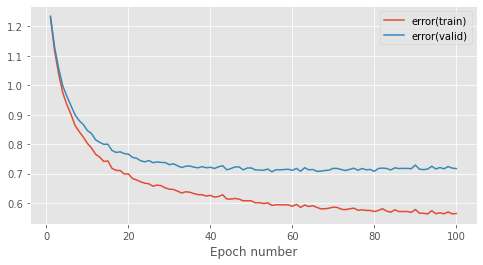

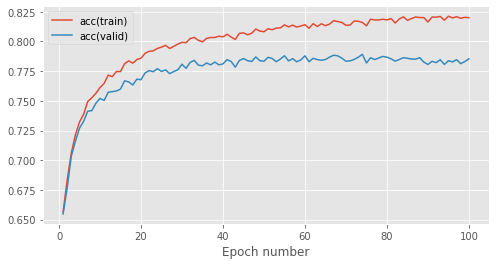

In [79]:
# hidden units = 32
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 32  # hidden_dim是隐藏层节点数

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
# model = MultipleLayerModel([
#     AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
#     ReluLayer(),
#     AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
#     ReluLayer(),
#     AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
# ])

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])


error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule()

#Remember to use notebook=False when you write a script to be run in a terminal
stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

In [80]:
print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))

    final error(train) = 5.65e-01
    final error(valid) = 7.17e-01
    final acc(train)   = 8.20e-01
    final acc(valid)   = 7.85e-01
    run time per epoch = 2.08


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 2.1s to complete
    error(train)=1.06e+00, acc(train)=7.02e-01, error(valid)=1.07e+00, acc(valid)=6.99e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 2.0s to complete
    error(train)=8.93e-01, acc(train)=7.40e-01, error(valid)=9.19e-01, acc(valid)=7.27e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 2.0s to complete
    error(train)=7.89e-01, acc(train)=7.68e-01, error(valid)=8.22e-01, acc(valid)=7.62e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 2.0s to complete
    error(train)=7.37e-01, acc(train)=7.80e-01, error(valid)=7.76e-01, acc(valid)=7.70e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 2.0s to complete
    error(train)=6.87e-01, acc(train)=7.92e-01, error(valid)=7.34e-01, acc(valid)=7.77e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 2.0s to complete
    error(train)=6.46e-01, acc(train)=8.05e-01, error(valid)=7.02e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 2.0s to complete
    error(train)=6.22e-01, acc(train)=8.08e-01, error(valid)=6.85e-01, acc(valid)=7.89e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 2.0s to complete
    error(train)=6.07e-01, acc(train)=8.10e-01, error(valid)=6.78e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 2.0s to complete
    error(train)=5.88e-01, acc(train)=8.14e-01, error(valid)=6.61e-01, acc(valid)=7.94e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 2.0s to complete
    error(train)=5.60e-01, acc(train)=8.24e-01, error(valid)=6.41e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 2.0s to complete
    error(train)=5.48e-01, acc(train)=8.28e-01, error(valid)=6.30e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 2.0s to complete
    error(train)=5.44e-01, acc(train)=8.27e-01, error(valid)=6.32e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 2.0s to complete
    error(train)=5.32e-01, acc(train)=8.31e-01, error(valid)=6.19e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 2.1s to complete
    error(train)=5.20e-01, acc(train)=8.33e-01, error(valid)=6.15e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 2.0s to complete
    error(train)=5.13e-01, acc(train)=8.35e-01, error(valid)=6.18e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 2.0s to complete
    error(train)=5.00e-01, acc(train)=8.37e-01, error(valid)=6.04e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 2.0s to complete
    error(train)=4.97e-01, acc(train)=8.39e-01, error(valid)=6.09e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 2.1s to complete
    error(train)=4.82e-01, acc(train)=8.44e-01, error(valid)=5.96e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 2.0s to complete
    error(train)=4.89e-01, acc(train)=8.40e-01, error(valid)=6.08e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 2.1s to complete
    error(train)=4.84e-01, acc(train)=8.42e-01, error(valid)=6.05e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 2.0s to complete
    error(train)=4.73e-01, acc(train)=8.44e-01, error(valid)=6.02e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 2.0s to complete
    error(train)=4.61e-01, acc(train)=8.50e-01, error(valid)=5.89e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 2.1s to complete
    error(train)=4.65e-01, acc(train)=8.48e-01, error(valid)=5.97e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 2.1s to complete
    error(train)=4.60e-01, acc(train)=8.48e-01, error(valid)=5.96e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 2.1s to complete
    error(train)=4.55e-01, acc(train)=8.51e-01, error(valid)=5.94e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 2.0s to complete
    error(train)=4.55e-01, acc(train)=8.51e-01, error(valid)=5.97e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 2.0s to complete
    error(train)=4.46e-01, acc(train)=8.53e-01, error(valid)=5.92e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 2.1s to complete
    error(train)=4.42e-01, acc(train)=8.54e-01, error(valid)=5.92e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 2.0s to complete
    error(train)=4.37e-01, acc(train)=8.57e-01, error(valid)=5.93e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 2.1s to complete
    error(train)=4.39e-01, acc(train)=8.53e-01, error(valid)=5.98e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 2.0s to complete
    error(train)=4.34e-01, acc(train)=8.57e-01, error(valid)=5.98e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 2.1s to complete
    error(train)=4.48e-01, acc(train)=8.49e-01, error(valid)=6.10e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 2.1s to complete
    error(train)=4.21e-01, acc(train)=8.59e-01, error(valid)=5.90e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 2.1s to complete
    error(train)=4.21e-01, acc(train)=8.59e-01, error(valid)=5.94e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 2.1s to complete
    error(train)=4.24e-01, acc(train)=8.57e-01, error(valid)=5.99e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 2.1s to complete
    error(train)=4.20e-01, acc(train)=8.60e-01, error(valid)=5.98e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 2.1s to complete
    error(train)=4.20e-01, acc(train)=8.61e-01, error(valid)=6.03e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 2.1s to complete
    error(train)=4.15e-01, acc(train)=8.61e-01, error(valid)=6.02e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 2.1s to complete
    error(train)=4.10e-01, acc(train)=8.62e-01, error(valid)=5.99e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 2.0s to complete
    error(train)=4.13e-01, acc(train)=8.60e-01, error(valid)=6.04e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 2.0s to complete
    error(train)=4.07e-01, acc(train)=8.64e-01, error(valid)=6.02e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 2.2s to complete
    error(train)=4.10e-01, acc(train)=8.61e-01, error(valid)=6.07e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 2.1s to complete
    error(train)=4.03e-01, acc(train)=8.63e-01, error(valid)=6.00e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 2.3s to complete
    error(train)=4.06e-01, acc(train)=8.63e-01, error(valid)=6.04e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 2.1s to complete
    error(train)=4.03e-01, acc(train)=8.63e-01, error(valid)=6.09e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 2.1s to complete
    error(train)=4.02e-01, acc(train)=8.65e-01, error(valid)=6.09e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 2.0s to complete
    error(train)=3.98e-01, acc(train)=8.65e-01, error(valid)=6.07e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 2.3s to complete
    error(train)=3.91e-01, acc(train)=8.67e-01, error(valid)=6.06e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 2.2s to complete
    error(train)=3.89e-01, acc(train)=8.68e-01, error(valid)=6.10e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 2.2s to complete
    error(train)=3.86e-01, acc(train)=8.70e-01, error(valid)=6.02e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 2.2s to complete
    error(train)=3.87e-01, acc(train)=8.70e-01, error(valid)=6.05e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 2.1s to complete
    error(train)=3.85e-01, acc(train)=8.68e-01, error(valid)=6.08e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 2.1s to complete
    error(train)=3.80e-01, acc(train)=8.70e-01, error(valid)=6.05e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 2.1s to complete
    error(train)=3.81e-01, acc(train)=8.71e-01, error(valid)=6.09e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 2.1s to complete
    error(train)=3.84e-01, acc(train)=8.69e-01, error(valid)=6.15e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 2.3s to complete
    error(train)=3.81e-01, acc(train)=8.71e-01, error(valid)=6.13e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 2.4s to complete
    error(train)=3.79e-01, acc(train)=8.72e-01, error(valid)=6.12e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 2.3s to complete
    error(train)=3.76e-01, acc(train)=8.70e-01, error(valid)=6.19e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 2.1s to complete
    error(train)=3.79e-01, acc(train)=8.69e-01, error(valid)=6.19e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 2.2s to complete
    error(train)=3.72e-01, acc(train)=8.73e-01, error(valid)=6.13e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 2.1s to complete
    error(train)=3.68e-01, acc(train)=8.74e-01, error(valid)=6.17e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 2.1s to complete
    error(train)=3.70e-01, acc(train)=8.72e-01, error(valid)=6.21e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 2.1s to complete
    error(train)=3.71e-01, acc(train)=8.72e-01, error(valid)=6.21e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 2.1s to complete
    error(train)=3.66e-01, acc(train)=8.75e-01, error(valid)=6.18e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 2.1s to complete
    error(train)=3.67e-01, acc(train)=8.74e-01, error(valid)=6.20e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 2.2s to complete
    error(train)=3.76e-01, acc(train)=8.71e-01, error(valid)=6.32e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 2.1s to complete
    error(train)=3.70e-01, acc(train)=8.72e-01, error(valid)=6.30e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 2.1s to complete
    error(train)=3.63e-01, acc(train)=8.76e-01, error(valid)=6.28e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 2.1s to complete
    error(train)=3.61e-01, acc(train)=8.76e-01, error(valid)=6.29e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 2.1s to complete
    error(train)=3.62e-01, acc(train)=8.75e-01, error(valid)=6.29e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 2.0s to complete
    error(train)=3.71e-01, acc(train)=8.72e-01, error(valid)=6.40e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 2.1s to complete
    error(train)=3.62e-01, acc(train)=8.75e-01, error(valid)=6.32e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 2.7s to complete
    error(train)=3.58e-01, acc(train)=8.76e-01, error(valid)=6.36e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 2.0s to complete
    error(train)=3.58e-01, acc(train)=8.77e-01, error(valid)=6.41e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 2.1s to complete
    error(train)=3.59e-01, acc(train)=8.77e-01, error(valid)=6.39e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 2.1s to complete
    error(train)=3.55e-01, acc(train)=8.76e-01, error(valid)=6.41e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 2.1s to complete
    error(train)=3.65e-01, acc(train)=8.74e-01, error(valid)=6.48e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 2.1s to complete
    error(train)=3.57e-01, acc(train)=8.76e-01, error(valid)=6.48e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 2.1s to complete
    error(train)=3.51e-01, acc(train)=8.79e-01, error(valid)=6.44e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 2.0s to complete
    error(train)=3.46e-01, acc(train)=8.81e-01, error(valid)=6.39e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 2.0s to complete
    error(train)=3.52e-01, acc(train)=8.78e-01, error(valid)=6.48e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 2.1s to complete
    error(train)=3.61e-01, acc(train)=8.74e-01, error(valid)=6.61e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 2.1s to complete
    error(train)=3.45e-01, acc(train)=8.81e-01, error(valid)=6.42e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 2.0s to complete
    error(train)=3.50e-01, acc(train)=8.79e-01, error(valid)=6.53e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 2.0s to complete
    error(train)=3.48e-01, acc(train)=8.80e-01, error(valid)=6.52e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 2.1s to complete
    error(train)=3.50e-01, acc(train)=8.78e-01, error(valid)=6.55e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 2.1s to complete
    error(train)=3.40e-01, acc(train)=8.83e-01, error(valid)=6.50e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 2.0s to complete
    error(train)=3.37e-01, acc(train)=8.84e-01, error(valid)=6.51e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 2.1s to complete
    error(train)=3.41e-01, acc(train)=8.81e-01, error(valid)=6.50e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 2.0s to complete
    error(train)=3.44e-01, acc(train)=8.80e-01, error(valid)=6.61e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 2.1s to complete
    error(train)=3.39e-01, acc(train)=8.82e-01, error(valid)=6.59e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 2.1s to complete
    error(train)=3.46e-01, acc(train)=8.79e-01, error(valid)=6.68e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 2.1s to complete
    error(train)=3.47e-01, acc(train)=8.79e-01, error(valid)=6.70e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 2.0s to complete
    error(train)=3.45e-01, acc(train)=8.81e-01, error(valid)=6.69e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 2.1s to complete
    error(train)=3.43e-01, acc(train)=8.81e-01, error(valid)=6.69e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 2.1s to complete
    error(train)=3.34e-01, acc(train)=8.84e-01, error(valid)=6.62e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 2.1s to complete
    error(train)=3.37e-01, acc(train)=8.83e-01, error(valid)=6.67e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 2.0s to complete
    error(train)=3.43e-01, acc(train)=8.80e-01, error(valid)=6.73e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 2.0s to complete
    error(train)=3.41e-01, acc(train)=8.79e-01, error(valid)=6.79e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 2.1s to complete
    error(train)=3.37e-01, acc(train)=8.82e-01, error(valid)=6.79e-01, acc(valid)=8.06e-01


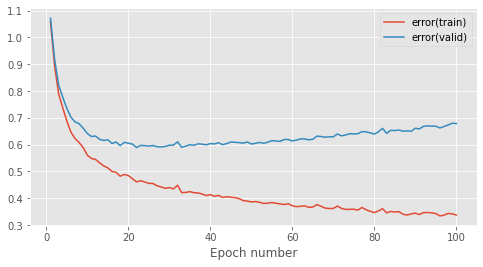

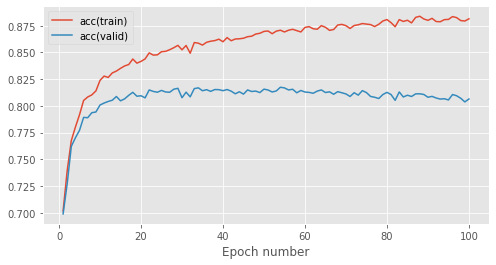

In [81]:
# hidden units = 64
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 64  # hidden_dim是隐藏层节点数

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
# model = MultipleLayerModel([
#     AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
#     ReluLayer(),
#     AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
#     ReluLayer(),
#     AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
# ])

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])


error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule()

#Remember to use notebook=False when you write a script to be run in a terminal
stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

In [82]:
print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))

    final error(train) = 3.37e-01
    final error(valid) = 6.79e-01
    final acc(train)   = 8.82e-01
    final acc(valid)   = 8.06e-01
    run time per epoch = 2.96


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 1: 4.1s to complete
    error(train)=9.06e-01, acc(train)=7.37e-01, error(valid)=9.22e-01, acc(valid)=7.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 2: 4.2s to complete
    error(train)=7.00e-01, acc(train)=7.90e-01, error(valid)=7.37e-01, acc(valid)=7.76e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 3: 4.2s to complete
    error(train)=6.05e-01, acc(train)=8.11e-01, error(valid)=6.57e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 4: 4.2s to complete
    error(train)=5.54e-01, acc(train)=8.24e-01, error(valid)=6.18e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 5: 4.2s to complete
    error(train)=5.04e-01, acc(train)=8.38e-01, error(valid)=5.81e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 6: 4.2s to complete
    error(train)=4.81e-01, acc(train)=8.45e-01, error(valid)=5.68e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 7: 4.3s to complete
    error(train)=4.64e-01, acc(train)=8.47e-01, error(valid)=5.60e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 8: 4.3s to complete
    error(train)=4.41e-01, acc(train)=8.53e-01, error(valid)=5.51e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 9: 4.2s to complete
    error(train)=4.15e-01, acc(train)=8.63e-01, error(valid)=5.37e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 10: 4.3s to complete
    error(train)=4.08e-01, acc(train)=8.63e-01, error(valid)=5.41e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 11: 4.2s to complete
    error(train)=3.87e-01, acc(train)=8.72e-01, error(valid)=5.30e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 12: 4.2s to complete
    error(train)=3.81e-01, acc(train)=8.71e-01, error(valid)=5.38e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 13: 4.2s to complete
    error(train)=3.81e-01, acc(train)=8.70e-01, error(valid)=5.46e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 14: 4.3s to complete
    error(train)=3.72e-01, acc(train)=8.74e-01, error(valid)=5.48e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 15: 4.3s to complete
    error(train)=3.61e-01, acc(train)=8.76e-01, error(valid)=5.42e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 16: 4.3s to complete
    error(train)=3.51e-01, acc(train)=8.79e-01, error(valid)=5.41e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 17: 4.3s to complete
    error(train)=3.56e-01, acc(train)=8.77e-01, error(valid)=5.57e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 18: 4.3s to complete
    error(train)=3.32e-01, acc(train)=8.85e-01, error(valid)=5.38e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 19: 4.3s to complete
    error(train)=3.25e-01, acc(train)=8.88e-01, error(valid)=5.43e-01, acc(valid)=8.33e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 20: 4.3s to complete
    error(train)=3.21e-01, acc(train)=8.88e-01, error(valid)=5.47e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 21: 4.3s to complete
    error(train)=3.15e-01, acc(train)=8.91e-01, error(valid)=5.49e-01, acc(valid)=8.29e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 22: 4.3s to complete
    error(train)=3.10e-01, acc(train)=8.92e-01, error(valid)=5.48e-01, acc(valid)=8.31e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 23: 4.2s to complete
    error(train)=3.08e-01, acc(train)=8.93e-01, error(valid)=5.63e-01, acc(valid)=8.28e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 24: 4.3s to complete
    error(train)=3.03e-01, acc(train)=8.93e-01, error(valid)=5.65e-01, acc(valid)=8.30e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 25: 4.2s to complete
    error(train)=3.00e-01, acc(train)=8.94e-01, error(valid)=5.63e-01, acc(valid)=8.25e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 26: 4.3s to complete
    error(train)=2.95e-01, acc(train)=8.95e-01, error(valid)=5.79e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 27: 4.3s to complete
    error(train)=2.89e-01, acc(train)=8.98e-01, error(valid)=5.73e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 28: 4.3s to complete
    error(train)=2.81e-01, acc(train)=9.00e-01, error(valid)=5.77e-01, acc(valid)=8.26e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 29: 4.3s to complete
    error(train)=2.81e-01, acc(train)=8.99e-01, error(valid)=5.83e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 30: 4.3s to complete
    error(train)=2.83e-01, acc(train)=9.00e-01, error(valid)=5.95e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 31: 4.2s to complete
    error(train)=2.74e-01, acc(train)=9.01e-01, error(valid)=5.92e-01, acc(valid)=8.24e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 32: 4.3s to complete
    error(train)=2.72e-01, acc(train)=9.02e-01, error(valid)=6.06e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 33: 4.3s to complete
    error(train)=2.66e-01, acc(train)=9.05e-01, error(valid)=6.00e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 34: 4.6s to complete
    error(train)=2.62e-01, acc(train)=9.06e-01, error(valid)=6.04e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 35: 4.4s to complete
    error(train)=2.64e-01, acc(train)=9.05e-01, error(valid)=6.10e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 36: 4.6s to complete
    error(train)=2.67e-01, acc(train)=9.03e-01, error(valid)=6.27e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 37: 4.3s to complete
    error(train)=2.59e-01, acc(train)=9.06e-01, error(valid)=6.22e-01, acc(valid)=8.22e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 38: 4.4s to complete
    error(train)=2.58e-01, acc(train)=9.06e-01, error(valid)=6.32e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 39: 4.3s to complete
    error(train)=2.56e-01, acc(train)=9.06e-01, error(valid)=6.34e-01, acc(valid)=8.19e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 40: 4.3s to complete
    error(train)=2.49e-01, acc(train)=9.10e-01, error(valid)=6.36e-01, acc(valid)=8.21e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 41: 4.3s to complete
    error(train)=2.41e-01, acc(train)=9.14e-01, error(valid)=6.32e-01, acc(valid)=8.23e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 42: 4.3s to complete
    error(train)=2.47e-01, acc(train)=9.09e-01, error(valid)=6.51e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 43: 4.2s to complete
    error(train)=2.41e-01, acc(train)=9.12e-01, error(valid)=6.54e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 44: 4.2s to complete
    error(train)=2.42e-01, acc(train)=9.11e-01, error(valid)=6.64e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 45: 4.3s to complete
    error(train)=2.39e-01, acc(train)=9.12e-01, error(valid)=6.65e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 46: 4.2s to complete
    error(train)=2.34e-01, acc(train)=9.15e-01, error(valid)=6.70e-01, acc(valid)=8.18e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 47: 4.3s to complete
    error(train)=2.44e-01, acc(train)=9.11e-01, error(valid)=6.83e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 48: 4.2s to complete
    error(train)=2.31e-01, acc(train)=9.15e-01, error(valid)=6.85e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 49: 4.2s to complete
    error(train)=2.24e-01, acc(train)=9.19e-01, error(valid)=6.85e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 50: 4.2s to complete
    error(train)=2.21e-01, acc(train)=9.20e-01, error(valid)=6.85e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 51: 4.2s to complete
    error(train)=2.22e-01, acc(train)=9.19e-01, error(valid)=6.98e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 52: 4.2s to complete
    error(train)=2.20e-01, acc(train)=9.19e-01, error(valid)=7.02e-01, acc(valid)=8.17e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 53: 4.3s to complete
    error(train)=2.24e-01, acc(train)=9.17e-01, error(valid)=7.18e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 54: 4.2s to complete
    error(train)=2.29e-01, acc(train)=9.14e-01, error(valid)=7.28e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 55: 4.5s to complete
    error(train)=2.14e-01, acc(train)=9.20e-01, error(valid)=7.09e-01, acc(valid)=8.15e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 56: 4.8s to complete
    error(train)=2.09e-01, acc(train)=9.23e-01, error(valid)=7.17e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 57: 4.6s to complete
    error(train)=2.14e-01, acc(train)=9.20e-01, error(valid)=7.31e-01, acc(valid)=8.13e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 58: 4.6s to complete
    error(train)=2.08e-01, acc(train)=9.23e-01, error(valid)=7.35e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 59: 4.9s to complete
    error(train)=2.04e-01, acc(train)=9.24e-01, error(valid)=7.38e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 60: 5.2s to complete
    error(train)=2.15e-01, acc(train)=9.20e-01, error(valid)=7.54e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 61: 4.3s to complete
    error(train)=2.04e-01, acc(train)=9.25e-01, error(valid)=7.49e-01, acc(valid)=8.16e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 62: 4.1s to complete
    error(train)=2.03e-01, acc(train)=9.24e-01, error(valid)=7.61e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 63: 4.1s to complete
    error(train)=2.02e-01, acc(train)=9.24e-01, error(valid)=7.67e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 64: 4.1s to complete
    error(train)=2.13e-01, acc(train)=9.19e-01, error(valid)=7.82e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 65: 4.4s to complete
    error(train)=1.95e-01, acc(train)=9.28e-01, error(valid)=7.61e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 66: 4.9s to complete
    error(train)=2.12e-01, acc(train)=9.19e-01, error(valid)=7.90e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 67: 4.2s to complete
    error(train)=1.93e-01, acc(train)=9.28e-01, error(valid)=7.86e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 68: 4.1s to complete
    error(train)=1.98e-01, acc(train)=9.25e-01, error(valid)=7.89e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 69: 4.2s to complete
    error(train)=1.89e-01, acc(train)=9.29e-01, error(valid)=8.01e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 70: 4.2s to complete
    error(train)=1.95e-01, acc(train)=9.25e-01, error(valid)=8.08e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 71: 4.1s to complete
    error(train)=1.93e-01, acc(train)=9.27e-01, error(valid)=8.16e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 72: 4.2s to complete
    error(train)=1.82e-01, acc(train)=9.33e-01, error(valid)=8.05e-01, acc(valid)=8.14e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 73: 4.1s to complete
    error(train)=1.96e-01, acc(train)=9.27e-01, error(valid)=8.34e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 74: 4.1s to complete
    error(train)=1.85e-01, acc(train)=9.31e-01, error(valid)=8.15e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 75: 4.1s to complete
    error(train)=1.81e-01, acc(train)=9.32e-01, error(valid)=8.28e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 76: 4.2s to complete
    error(train)=1.84e-01, acc(train)=9.30e-01, error(valid)=8.36e-01, acc(valid)=8.09e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 77: 4.1s to complete
    error(train)=1.82e-01, acc(train)=9.31e-01, error(valid)=8.43e-01, acc(valid)=8.11e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 78: 4.1s to complete
    error(train)=1.87e-01, acc(train)=9.29e-01, error(valid)=8.56e-01, acc(valid)=8.06e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 79: 4.7s to complete
    error(train)=1.82e-01, acc(train)=9.32e-01, error(valid)=8.54e-01, acc(valid)=8.12e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 80: 5.0s to complete
    error(train)=1.75e-01, acc(train)=9.34e-01, error(valid)=8.65e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 81: 5.2s to complete
    error(train)=1.76e-01, acc(train)=9.34e-01, error(valid)=8.60e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 82: 5.0s to complete
    error(train)=1.77e-01, acc(train)=9.33e-01, error(valid)=8.67e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 83: 4.5s to complete
    error(train)=1.86e-01, acc(train)=9.29e-01, error(valid)=8.99e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 84: 4.2s to complete
    error(train)=1.73e-01, acc(train)=9.34e-01, error(valid)=8.87e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 85: 4.1s to complete
    error(train)=1.72e-01, acc(train)=9.35e-01, error(valid)=8.96e-01, acc(valid)=8.10e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 86: 4.2s to complete
    error(train)=1.70e-01, acc(train)=9.36e-01, error(valid)=8.99e-01, acc(valid)=8.04e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 87: 4.1s to complete
    error(train)=1.81e-01, acc(train)=9.31e-01, error(valid)=9.13e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 88: 4.1s to complete
    error(train)=1.68e-01, acc(train)=9.36e-01, error(valid)=9.14e-01, acc(valid)=8.08e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 89: 4.1s to complete
    error(train)=1.71e-01, acc(train)=9.33e-01, error(valid)=9.25e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 90: 4.1s to complete
    error(train)=1.74e-01, acc(train)=9.32e-01, error(valid)=9.28e-01, acc(valid)=8.05e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 91: 4.0s to complete
    error(train)=1.68e-01, acc(train)=9.36e-01, error(valid)=9.46e-01, acc(valid)=8.00e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 92: 4.1s to complete
    error(train)=1.71e-01, acc(train)=9.34e-01, error(valid)=9.32e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 93: 4.1s to complete
    error(train)=1.64e-01, acc(train)=9.38e-01, error(valid)=9.37e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 94: 4.1s to complete
    error(train)=1.67e-01, acc(train)=9.35e-01, error(valid)=9.52e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 95: 4.1s to complete
    error(train)=1.68e-01, acc(train)=9.35e-01, error(valid)=9.60e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 96: 4.1s to complete
    error(train)=1.75e-01, acc(train)=9.30e-01, error(valid)=9.88e-01, acc(valid)=7.96e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 97: 4.0s to complete
    error(train)=1.57e-01, acc(train)=9.41e-01, error(valid)=9.63e-01, acc(valid)=8.03e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 98: 4.1s to complete
    error(train)=1.54e-01, acc(train)=9.42e-01, error(valid)=9.64e-01, acc(valid)=8.07e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 99: 4.1s to complete
    error(train)=1.67e-01, acc(train)=9.36e-01, error(valid)=9.87e-01, acc(valid)=8.01e-01


  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 100: 4.1s to complete
    error(train)=1.59e-01, acc(train)=9.39e-01, error(valid)=9.99e-01, acc(valid)=8.02e-01


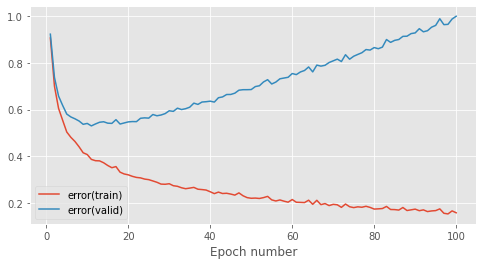

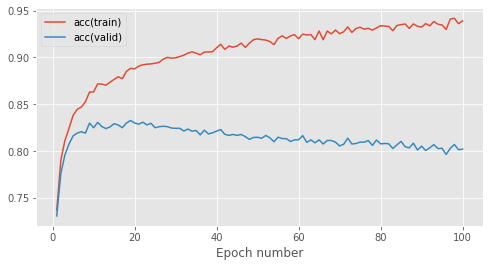

In [83]:
# hidden units = 128
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128  # hidden_dim是隐藏层节点数

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
# model = MultipleLayerModel([
#     AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
#     ReluLayer(),
#     AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
#     ReluLayer(),
#     AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
# ])

model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])


error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule()

#Remember to use notebook=False when you write a script to be run in a terminal
stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

In [84]:
print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))

    final error(train) = 1.59e-01
    final error(valid) = 9.99e-01
    final acc(train)   = 9.39e-01
    final acc(valid)   = 8.02e-01
    run time per epoch = 5.36
